In [9]:
import pandas as pd

data = pd.read_csv('click_stream.csv', header=None, names=['id','page','date'])

data.head()

,id,page,date
0,313593,1_home_page,2015-02-26
1,468315,1_home_page,2015-02-21
2,264005,1_home_page,2015-03-25
3,290784,1_home_page,2015-03-14
4,639104,1_home_page,2015-01-03


In [10]:
pages = data.groupby('page')['id'].agg('count')
pages

page
1_home_page                    90400
2_search_page                  45200
3_payment_page                  6030
4_payment_confirmation_page      452
Name: id, dtype: int64

In [13]:
data['month'] = data['date'].apply(lambda date: date[0:7])
data.head()

,id,page,date,month
0,313593,1_home_page,2015-02-26,2015-02
1,468315,1_home_page,2015-02-21,2015-02
2,264005,1_home_page,2015-03-25,2015-03
3,290784,1_home_page,2015-03-14,2015-03
4,639104,1_home_page,2015-01-03,2015-01


In [37]:
monthly = data.groupby(['page','month'])['id'].agg('count').reset_index().sort_values(by='page', ascending=False)
monthly

,page,month,id
12,4_payment_confirmation_page,2015-01,189
13,4_payment_confirmation_page,2015-02,173
14,4_payment_confirmation_page,2015-03,44
15,4_payment_confirmation_page,2015-04,46
8,3_payment_page,2015-01,2390
9,3_payment_page,2015-02,2412
10,3_payment_page,2015-03,631
11,3_payment_page,2015-04,597
4,2_search_page,2015-01,13554
5,2_search_page,2015-02,13687


In [38]:
months = monthly.groupby('month')['id'].sum().reset_index()
months

,month,id
0,2015-01,38733
1,2015-02,38872
2,2015-03,32154
3,2015-04,32323


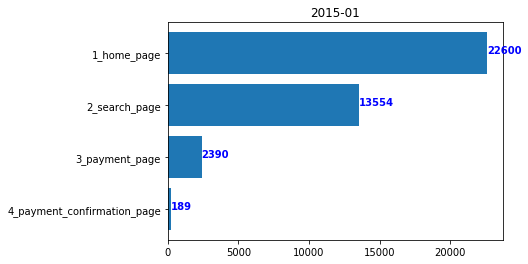

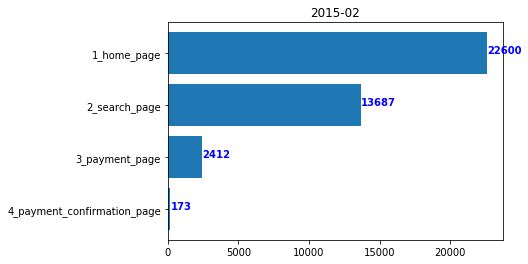

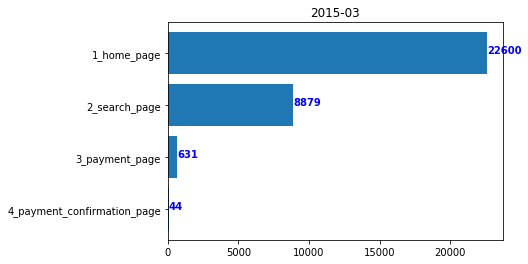

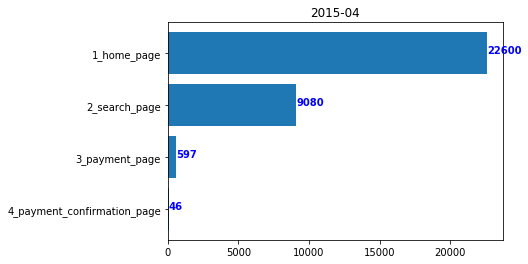

In [45]:
import matplotlib.pyplot as plt
for index, row in months.iterrows():
    fig, subplot = plt.subplots()
    y = monthly[monthly['month']==row.month].id
    subplot.barh(monthly[monthly['month']==row.month].page, 
           y)
    subplot.set_title(row.month)
    for i, v in enumerate(y):
        subplot.text(v + 3, i, str(v), color='blue', fontweight='bold')